# OZNAL project 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import linear_model
from numbers import Number

data = pd.read_csv('./dataset/Video_Game_Sales_as_of_Jan_2017.csv', usecols=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating'])
data.head()
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN


## Scatter matrix 

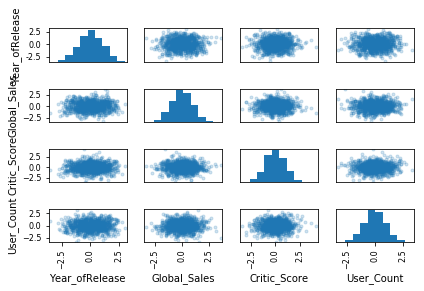

In [14]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['Year_ofRelease','Global_Sales','Critic_Score','User_Count'])
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.show()


## Global sales boxplot

In [6]:
column = list(data['Global_Sales']) #list(data['Global_Sales'])
plt.ylim(0, 1.2)
plt.boxplot(column)
plt.show()
median = np.median(column)
print "Median:" + str(median)
upper_quartile = np.percentile(column, 75)
print "U3:" + str(upper_quartile)
lower_quartile = np.percentile(column, 25)
print "Q1:" + str(lower_quartile)

NameError: name 'data' is not defined

## Critic score boxplot

In [ ]:
critic_score = np.array(data['Critic_Score'])
critic_score = critic_score[~np.isnan(critic_score)]
print critic_score
#plt.ylim(0, 1.2)
plt.boxplot(critic_score)
plt.show()

## Correlation between sales in different parts of the world

In [ ]:
# # global sales - critic score - 0.245523
# df = pd.read_csv('./Video_Game_Sales_as_of_Jan_2017.csv', usecols=[9,10])
# df.corr()

# # global sales - user score - 0.0872
# df = pd.read_csv('./Video_Game_Sales_as_of_Jan_2017.csv', usecols=[9,12])
# df.corr()

# # user score - critic score - 0.582
# df = pd.read_csv('./Video_Game_Sales_as_of_Jan_2017.csv', usecols=[10,12])
# df.corr()

#                    global
# 5 - NA_Sales     - 0.9410
# 6 - EU_Sales     - 0.9016
# 7 - JP_Sales     - 0.6133
# 8 - Other_Sales  - 0.7513
# 9 -Global_Sales  - 
df = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df.corr()

## Unique genres

In [ ]:
genres = data.Genre.unique()
genres

## Boxplots for Global sales grouped by genre

In [7]:
box_plot_data = []
box_plot_x_axis = ['']
for genre in genres:
    genre_data = data.loc[data['Genre'] == genre]
    box_plot_data.append(list(genre_data['Global_Sales']))
    box_plot_x_axis.append(genre)

plt.ylim(-0.1, 1.8)
plt.boxplot(box_plot_data)
plt.xticks(range(len(box_plot_x_axis)),box_plot_x_axis, rotation=25)
plt.show()


NameError: name 'genres' is not defined

In [8]:
platforms = data.Platform.unique()
platforms

NameError: name 'data' is not defined

In [9]:
fig = plt.figure(figsize=(10, 6), dpi=300)
box_plot_data = []
box_plot_x_axis = ['']
for platform in platforms:
    platform_data = data.loc[data['Platform'] == platform]
#     platform_data = platform_data[platform_data['Year_of_Release'] >= 2010]
    if len(platform_data.index) > 0:
        box_plot_data.append(list(platform_data['Global_Sales']))
        box_plot_x_axis.append(platform)

plt.ylim(-0.1, 4.1)
plt.boxplot(box_plot_data)
plt.xticks(range(len(box_plot_x_axis)),box_plot_x_axis, rotation=50)
plt.show()

NameError: name 'platforms' is not defined

## Linear regression using critic and user scores

          features  estimatedCoefficients
0  Year_of_Release              -0.049440
1     Global_Sales               0.015159
2     Critic_Score               0.028747
3     Critic_Count              -0.061889
4       User_Score               0.000614
MSE: 3.26
Variance: 0.12
(7191, 5)
(7191,)


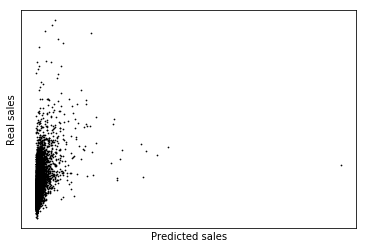

In [82]:
filtered_data = data[(np.isnan(data['Critic_Score']) != True) & (np.isnan(data['User_Score']) != True) & (np.isnan(data['User_Count']) != True) & (np.isnan(data['Critic_Count']) != True)]
X = filtered_data.drop(['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Rating', 'Name', 'Genre', 'Publisher', 'Platform'], axis = 1).sample(1000)
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X.drop(['Global_Sales'], axis = 1), X['Global_Sales'])

print pd.DataFrame(zip(X.columns, lin_reg.coef_), columns = ['features', 'estimatedCoefficients'])

test_setA = filtered_data['Global_Sales']
test_setB = filtered_data.drop(['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Rating', 'Name', 'Genre', 'Publisher', 'Platform'], axis = 1)
print("MSE: %.2f" % np.mean((lin_reg.predict(test_setB) - test_setA) ** 2))

print('Variance: %.2f' % lin_reg.score(test_setB, test_setA))

print test_setB.shape
print test_setA.shape

#plt.scatter(lin_reg.predict(test_setB)-test_setA, lin_reg.predict(test_setB),  color='blue', linewidth=1)
plt.scatter(test_setA, lin_reg.predict(test_setB), color='black', s=0.5)
plt.ylabel("Real sales")
plt.xlabel("Predicted sales")


plt.xticks(())
plt.yticks(())

plt.show()
